In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings, string
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('Preprocessed Fake Reviews Detection Dataset-1.csv')
df.head()

,Unnamed: 0,category,rating,label,text_
0,0,Home_and_Kitchen_5,5.0,CG,love well made sturdi comfort i love veri pretti
1,1,Home_and_Kitchen_5,5.0,CG,love great upgrad origin i 've mine coupl year
2,2,Home_and_Kitchen_5,5.0,CG,thi pillow save back i love look feel pillow
3,3,Home_and_Kitchen_5,1.0,CG,miss inform use great product price i
4,4,Home_and_Kitchen_5,5.0,CG,veri nice set good qualiti we set two month


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  40432 non-null  int64  
 1   category    40432 non-null  object 
 2   rating      40432 non-null  float64
 3   label       40432 non-null  object 
 4   text_       40431 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 1.5+ MB


In [4]:
#dropping the Unnamed:0 column since it has no role in model building
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,love well made sturdi comfort i love veri pretti
1,Home_and_Kitchen_5,5.0,CG,love great upgrad origin i 've mine coupl year
2,Home_and_Kitchen_5,5.0,CG,thi pillow save back i love look feel pillow
3,Home_and_Kitchen_5,1.0,CG,miss inform use great product price i
4,Home_and_Kitchen_5,5.0,CG,veri nice set good qualiti we set two month


In [5]:
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,love well made sturdi comfort i love veri pretti
1,Home_and_Kitchen_5,5.0,CG,love great upgrad origin i 've mine coupl year
2,Home_and_Kitchen_5,5.0,CG,thi pillow save back i love look feel pillow
3,Home_and_Kitchen_5,1.0,CG,miss inform use great product price i
4,Home_and_Kitchen_5,5.0,CG,veri nice set good qualiti we set two month


In [6]:
# Drop rows with missing values
df.dropna(inplace=True)

In [7]:
#storing length of each review in a new column named 'length'  
df['length'] = df['text_'].apply(len)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40431 entries, 0 to 40431
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40431 non-null  object 
 1   rating    40431 non-null  float64
 2   label     40431 non-null  object 
 3   text_     40431 non-null  object 
 4   length    40431 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 1.9+ MB


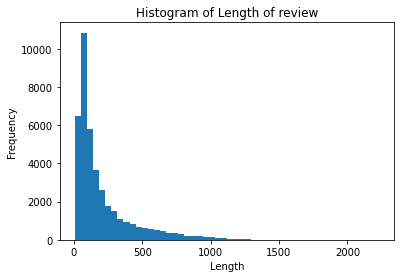

In [9]:
#plotting the graph for length of review vs frequency
plt.hist(df['length'],bins=50)
plt.title('Histogram of Length of review')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

In [10]:
#Statistics of the data based on the column label
df.groupby('label').describe()

rating                                                length  \
         count      mean       std  min  25%  50%  75%  max    count   
label                                                                  
CG     20215.0  4.259906  1.141092  1.0  4.0  5.0  5.0  5.0  20215.0   
OR     20216.0  4.253265  1.147652  1.0  4.0  5.0  5.0  5.0  20216.0   

                                                                 
             mean         std   min   25%    50%    75%     max  
label                                                            
CG     173.639030  173.955252  13.0  57.0   99.0  217.0  1300.0  
OR     237.893599  252.920950   8.0  74.0  134.0  296.0  2232.0

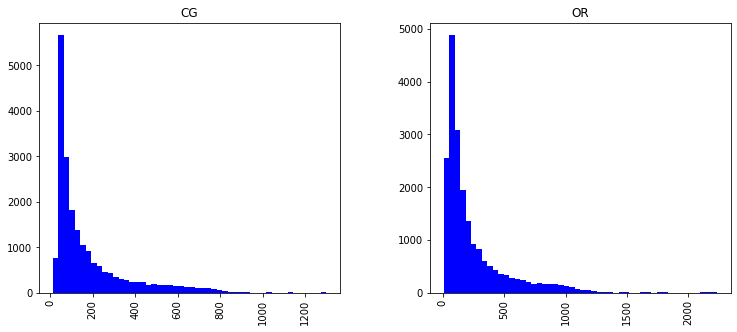

In [11]:
#plotting the graph for length of review vs frequency for CG and OR
df.hist(column='length',by='label',bins=50,color='blue',figsize=(12,5))
plt.show()

Let's extract the largest review...

In [12]:
#retrieve the text associated with the longest entry in the 'text_' column where the 'label' is 'OR'.
df[df['label']=='OR'][['text_','length']].sort_values(by='length',ascending=False).head().iloc[0].text_

"weak on current scienc after see twice i agre much posit five star review out respect read review i 'll repeat everyth i like present i found goofi over ear hairdo facial hair arrang daniel vitali describ `` wild food expert '' distract ugh ditto david wolf extrem goofi wild hairdo on hand jon gabriel describ `` author weight loss expert '' nice groom good present hi stori person transform fellow pound whew becom jock normal weight inspir christian northrup preserv rank one america 's cutest doctor a realli nice look woman present dr. mercola jason vale kri carr alejandro junger fine it disappoint jami oliv popular uk give babi cow growth fluid pas unscientif popular idea milk none present anyth zilch say work doctor t. colin campbel milk bodi bad it good see present take stand sugar they agre evil sugar refin carbohydr with respect dr. northrup `` it 's fat make fat 's sugar '' statement pas muster commun expert recogn evil sugar not mutual exclus recogn proven danger fat particularl

In [13]:
df.length.describe()

count    40431.000000
mean       205.767109
std        219.422327
min          8.000000
25%         64.000000
50%        116.000000
75%        253.000000
max       2232.000000
Name: length, dtype: float64

In [14]:
#Removes punctuation and filters out common English stopwords using NLTK. To be used in the preprocessing pipeline
def text_process(review):
    nopunc = [char for char in review if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [15]:
#Creating a Bag-of-Words (BoW) transformer using the CountVectorizer and incorporating the function 'text_process' for text preprocessing.
bow_transformer = CountVectorizer(analyzer=text_process)
bow_transformer

CountVectorizer(analyzer=<function text_process at 0x000001F5760414C0>)

In [16]:
#Printing the total vocabulary size of the 'text_' column.
bow_transformer.fit(df['text_'])
print("Total Vocabulary:",len(bow_transformer.vocabulary_))

Total Vocabulary: 34452


In [17]:
#Displaying the 4th review in the dataset
review4 = df['text_'][3]
review4

'miss inform use great product price i'

In [18]:
#Using bow_transformer on the 4th review to gain insights
bow_msg4 = bow_transformer.transform([review4])
print(bow_msg4)
print(bow_msg4.shape)

  (0, 13599)	1
  (0, 15841)	1
  (0, 19849)	1
  (0, 23848)	1
  (0, 23978)	1
  (0, 32184)	1
(1, 34452)


There are 6 unique words in the 4th review.

In [19]:
#Using bow_transformer on the every review in the dataset
bow_reviews = bow_transformer.transform(df['text_'])
bow_reviews

<40431x34452 sparse matrix of type '<class 'numpy.int64'>'
	with 1013899 stored elements in Compressed Sparse Row format>

In [20]:
#printing shape and non-zero values in the BOW model. The '.shape' attribute is used to get the dimensions and the '.nnz' attribute is used to get the count of non-zero elements in a sparse matrix. 
print("Shape of Bag of Words Transformer for the entire reviews corpus:",bow_reviews.shape)
print("Amount of non zero values in the bag of words model:",bow_reviews.nnz)

Shape of Bag of Words Transformer for the entire reviews corpus: (40431, 34452)
Amount of non zero values in the bag of words model: 1013899


In [21]:
#Printing sparsity of the matrix
print("Sparsity:",np.round((bow_reviews.nnz/(bow_reviews.shape[0]*bow_reviews.shape[1]))*100,2))

Sparsity: 0.07


In [22]:
#Applying TF-IDF 
tfidf_transformer = TfidfTransformer().fit(bow_reviews)
tfidf_rev4 = tfidf_transformer.transform(bow_msg4)
print(bow_msg4)

  (0, 13599)	1
  (0, 15841)	1
  (0, 19849)	1
  (0, 23848)	1
  (0, 23978)	1
  (0, 32184)	1


In [23]:
#Printing the IDF values for the terms 'mango' and 'book'
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['mango']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['book']])

10.91422964906803
2.821684385176731


In [24]:
#Applying TF-IDF on the whole whole dataset and printing the shape and dimension of the matrix
tfidf_reviews = tfidf_transformer.transform(bow_reviews)
print("Shape:",tfidf_reviews.shape)
print("No. of Dimensions:",tfidf_reviews.ndim)

Shape: (40431, 34452)
No. of Dimensions: 2


In [25]:
#Shuffling the dataset for model training and testing
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [26]:
df.head(5)

,category,rating,label,text_,length
0,Kindle_Store_5,3.0,CG,eva find way escap abus mother when meet hands...,536
1,Clothing_Shoes_and_Jewelry_5,5.0,CG,thi second glamoris i love look i keep bag war...,193
2,Kindle_Store_5,4.0,OR,i absolut love seri the raven hottest protect ...,109
3,Movies_and_TV_5,5.0,CG,probabl best movi rutger howerton made not man...,125
4,Clothing_Shoes_and_Jewelry_5,5.0,OR,unfortun black n't work lot dress i want love ...,168


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40431 entries, 0 to 40430
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40431 non-null  object 
 1   rating    40431 non-null  float64
 2   label     40431 non-null  object 
 3   text_     40431 non-null  object 
 4   length    40431 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 1.5+ MB


## Creating training and testing data

In [28]:
#splitting the data into train and test split
review_train, review_test, label_train, label_test = train_test_split(df[['category','rating','text_']],df['label'],test_size=0.35)

In [29]:
#Printing shapes of train and test splits
review_train.shape,review_test.shape, label_train.shape, label_test.shape

((26280, 3), (14151, 3), (26280,), (14151,))

## Preprocessing the data

In [30]:
#importing ColumnTransformer to apply different transformations to different columns and OneHotEncoder to encode the categorical variables
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [31]:
# Define the features based on column types
text_features = 'text_'
categorical_features = ['category', 'rating']

In [32]:
# Create a ColumnTransformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('text', Pipeline([
            ('bow', CountVectorizer(analyzer=text_process)),
            ('tfidf', TfidfTransformer())
        ]), text_features),
        ('categorical',  OneHotEncoder(), categorical_features)
    ])

## Training and testing Multinomial Naive Bayes Algorithm on the preprocessed data

In [93]:
# Create the pipeline with the ColumnTransformer and the Multinomial Naive Bayes classifier
pipeline_mnb = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', MultinomialNB())
])

In [94]:
pipeline_mnb.fit(review_train,label_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('text',
                                                  Pipeline(steps=[('bow',
                                                                   CountVectorizer(analyzer=<function text_process at 0x000001EE914010D0>)),
                                                                  ('tfidf',
                                                                   TfidfTransformer())]),
                                                  'text_'),
                                                 ('categorical',
                                                  OneHotEncoder(),
                                                  ['category', 'rating'])])),
                ('classifier', MultinomialNB())])

In [95]:
mnb_pred = pipeline_mnb.predict(review_test)
mnb_pred.shape

(14151,)

In [96]:
print('Classification Report:',classification_report(label_test,mnb_pred))
print('Confusion Matrix:',confusion_matrix(label_test,mnb_pred))
print('Accuracy Score:',accuracy_score(label_test,mnb_pred))

Classification Report:               precision    recall  f1-score   support

          CG       0.81      0.90      0.86      7087
          OR       0.89      0.79      0.84      7064

    accuracy                           0.85     14151
   macro avg       0.85      0.85      0.85     14151
weighted avg       0.85      0.85      0.85     14151

Confusion Matrix: [[6397  690]
 [1479 5585]]
Accuracy Score: 0.8467246131015476


In [97]:
#Printing accuracy of the Multinomial NB model
print('Multinomial NB Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,mnb_pred)*100,2)) + '%')

Multinomial NB Model Prediction Accuracy: 84.67%


In [98]:
#Using the model to predict a new review
input_data = pd.DataFrame({'category': ['Movies_and_TV_5'], 'rating': [5.0], 'text_': ['good movie special affects great theme show a little history about world war one glamourized by hollywood trench warfare was brutal']})
predictions = pipeline_mnb.predict(input_data)
if(predictions[0]=='OR'):
    print("Original review")
else:
    print("Computer Generated review")

Original review


## Training and testing Random Forest Algorithm on the preprocessed data

In [99]:
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier',RandomForestClassifier())
])

In [100]:
pipeline_rf.fit(review_train,label_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('text',
                                                  Pipeline(steps=[('bow',
                                                                   CountVectorizer(analyzer=<function text_process at 0x000001EE914010D0>)),
                                                                  ('tfidf',
                                                                   TfidfTransformer())]),
                                                  'text_'),
                                                 ('categorical',
                                                  OneHotEncoder(),
                                                  ['category', 'rating'])])),
                ('classifier', RandomForestClassifier())])

In [101]:
rfc_pred = pipeline_rf.predict(review_test)
rfc_pred,rfc_pred.shape

(array(['CG', 'CG', 'OR', ..., 'OR', 'OR', 'CG'], dtype=object), (14151,))

In [102]:
print('Classification Report:',classification_report(label_test,rfc_pred))
print('Confusion Matrix:',confusion_matrix(label_test,rfc_pred))
print('Accuracy Score:',accuracy_score(label_test,rfc_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,rfc_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.82      0.89      0.85      7087
          OR       0.88      0.81      0.84      7064

    accuracy                           0.85     14151
   macro avg       0.85      0.85      0.85     14151
weighted avg       0.85      0.85      0.85     14151

Confusion Matrix: [[6291  796]
 [1377 5687]]
Accuracy Score: 0.846441947565543
Model Prediction Accuracy: 84.64%


In [103]:
#Printing accuracy of the Random Forest model
print('Random Forest Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,rfc_pred)*100,2)) + '%')

Random Forest Model Prediction Accuracy: 84.64%


In [113]:
#Using the model to predict a new review
input_data = pd.DataFrame({'category': ['Movies_and_TV_5'], 'rating': [5.0], 'text_': ['good movie special affects great theme show a little history about world war one glamourized by hollywood trench warfare was brutal']})
predictions = pipeline_rf.predict(input_data)
if(predictions[0]=='OR'):
    print("Original review")
else:
    print("Computer Generated review")

Original review


## Training and testing Decision Tree Algorithm on the preprocessed data

In [105]:
pipeline_dt = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier',DecisionTreeClassifier())
])

In [106]:
pipeline_dt.fit(review_train,label_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('text',
                                                  Pipeline(steps=[('bow',
                                                                   CountVectorizer(analyzer=<function text_process at 0x000001EE914010D0>)),
                                                                  ('tfidf',
                                                                   TfidfTransformer())]),
                                                  'text_'),
                                                 ('categorical',
                                                  OneHotEncoder(),
                                                  ['category', 'rating'])])),
                ('classifier', DecisionTreeClassifier())])

In [107]:
dtree_pred = pipeline_dt.predict(review_test)
dtree_pred,dtree_pred.shape

(array(['CG', 'OR', 'CG', ..., 'OR', 'OR', 'OR'], dtype=object), (14151,))

In [108]:
print('Classification Report:',classification_report(label_test,dtree_pred))
print('Confusion Matrix:',confusion_matrix(label_test,dtree_pred))
print('Accuracy Score:',accuracy_score(label_test,dtree_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,dtree_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.73      0.75      0.74      7087
          OR       0.74      0.72      0.73      7064

    accuracy                           0.74     14151
   macro avg       0.74      0.74      0.74     14151
weighted avg       0.74      0.74      0.74     14151

Confusion Matrix: [[5329 1758]
 [1964 5100]]
Accuracy Score: 0.7369797187477917
Model Prediction Accuracy: 73.7%


In [109]:
#Printing accuracy of the Decision Tree model
print('Decision Tree Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,dtree_pred)*100,2)) + '%')

Decision Tree Model Prediction Accuracy: 73.7%


In [114]:
#Using the model to predict a new review
input_data = pd.DataFrame({'category': ['Movies_and_TV_5'], 'rating': [5.0], 'text_': ['good movie special affects great theme show a little history about world war one glamourized by hollywood trench warfare was brutal']})
predictions = pipeline_dt.predict(input_data)
if(predictions[0]=='OR'):
    print("Original review")
else:
    print("Computer Generated review")

Original review


## Training and testing KNeighbors Classifier Algorithm on the preprocessed data

In [111]:
pipeline_knn = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier',KNeighborsClassifier(n_neighbors=5))
])

In [112]:
pipeline_knn.fit(review_train,label_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('text',
                                                  Pipeline(steps=[('bow',
                                                                   CountVectorizer(analyzer=<function text_process at 0x000001EE914010D0>)),
                                                                  ('tfidf',
                                                                   TfidfTransformer())]),
                                                  'text_'),
                                                 ('categorical',
                                                  OneHotEncoder(),
                                                  ['category', 'rating'])])),
                ('classifier', KNeighborsClassifier())])

In [115]:
knn_pred = pipeline_knn.predict(review_test)
knn_pred,knn_pred.shape

(array(['CG', 'CG', 'CG', ..., 'OR', 'OR', 'CG'], dtype=object), (14151,))

In [116]:
print('Classification Report:',classification_report(label_test,knn_pred))
print('Confusion Matrix:',confusion_matrix(label_test,knn_pred))
print('Accuracy Score:',accuracy_score(label_test,knn_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,knn_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.58      0.93      0.71      7087
          OR       0.82      0.32      0.46      7064

    accuracy                           0.62     14151
   macro avg       0.70      0.62      0.58     14151
weighted avg       0.70      0.62      0.58     14151

Confusion Matrix: [[6577  510]
 [4816 2248]]
Accuracy Score: 0.623630838809978
Model Prediction Accuracy: 62.36%


In [117]:
#Printing accuracy of the KNN model
print('KNN Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,knn_pred)*100,2)) + '%')

KNN Model Prediction Accuracy: 62.36%


In [118]:
#Using the model to predict a new review
input_data = pd.DataFrame({'category': ['Movies_and_TV_5'], 'rating': [5.0], 'text_': ['good movie special affects great theme show a little history about world war one glamourized by hollywood trench warfare was brutal']})
predictions = pipeline_knn.predict(input_data)
if(predictions[0]=='OR'):
    print("Original review")
else:
    print("Computer Generated review")

Computer Generated review


## Training and testing Support Vector Classifier Algorithm on the preprocessed data

In [33]:
pipeline_svc = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier',SVC())
])

In [34]:
pipeline_svc.fit(review_train,label_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('text',
                                                  Pipeline(steps=[('bow',
                                                                   CountVectorizer(analyzer=<function text_process at 0x000001F5760414C0>)),
                                                                  ('tfidf',
                                                                   TfidfTransformer())]),
                                                  'text_'),
                                                 ('categorical',
                                                  OneHotEncoder(),
                                                  ['category', 'rating'])])),
                ('classifier', SVC())])

In [35]:
svc_pred = pipeline_svc.predict(review_test)
svc_pred,svc_pred.shape

(array(['OR', 'OR', 'CG', ..., 'OR', 'OR', 'OR'], dtype=object), (14151,))

In [36]:
print(classification_report(label_test,svc_pred))
print("\n")
print('Accuracy Score:',accuracy_score(label_test,svc_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,svc_pred)*100,2)) + '%')

              precision    recall  f1-score   support

          CG       0.90      0.84      0.87      7046
          OR       0.85      0.90      0.87      7105

    accuracy                           0.87     14151
   macro avg       0.87      0.87      0.87     14151
weighted avg       0.87      0.87      0.87     14151



Accuracy Score: 0.8701151862059219
Model Prediction Accuracy: 87.01%


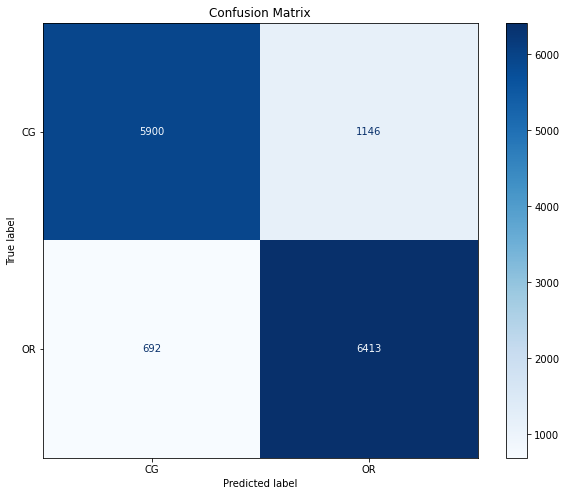

In [42]:
# # Compute the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# # Compute the confusion matrix


# 
# # Display the confusion matrix as a heatmap
# labels = df.label
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
# disp.plot(cmap='Blues', values_format='d')
unique_labels = df['label'].unique()
cm = confusion_matrix(label_test,svc_pred,labels=unique_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)

# Create a figure and specify the figure size (adjust as needed)
plt.figure(figsize=(10, 8))

# Plot the confusion matrix
disp.plot(cmap='Blues', values_format='d', ax=plt.gca())  # Use current axis 'plt.gca()'

# Add title and display the plot
plt.title('Confusion Matrix')
plt.show()

In [123]:
#Printing accuracy of the SVC model
print('SVC Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,svc_pred)*100,2)) + '%')

SVC Model Prediction Accuracy: 87.17%


In [124]:
#Using the model to predict a new review
input_data = pd.DataFrame({'category': ['Movies_and_TV_5'], 'rating': [5.0], 'text_': ['good movie special affects great theme show a little history about world war one glamourized by hollywood trench warfare was brutal']})
predictions = pipeline_svc.predict(input_data)
if(predictions[0]=='OR'):
    print("Original review")
else:
    print("Computer Generated review")

Original review


## Training and testing Logistic Regression Algorithm on the preprocessed data

In [125]:
pipeline_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier',LogisticRegression())
])

In [126]:
pipeline_lr.fit(review_train,label_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('text',
                                                  Pipeline(steps=[('bow',
                                                                   CountVectorizer(analyzer=<function text_process at 0x000001EE914010D0>)),
                                                                  ('tfidf',
                                                                   TfidfTransformer())]),
                                                  'text_'),
                                                 ('categorical',
                                                  OneHotEncoder(),
                                                  ['category', 'rating'])])),
                ('classifier', LogisticRegression())])

In [127]:
lr_pred = pipeline_lr.predict(review_test)
lr_pred,lr_pred.shape

(array(['CG', 'CG', 'OR', ..., 'OR', 'OR', 'CG'], dtype=object), (14151,))

In [128]:
print('Classification Report:',classification_report(label_test,lr_pred))
print('Confusion Matrix:',confusion_matrix(label_test,lr_pred))
print('Accuracy Score:',accuracy_score(label_test,lr_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,lr_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.88      0.85      0.87      7087
          OR       0.85      0.88      0.87      7064

    accuracy                           0.87     14151
   macro avg       0.87      0.87      0.87     14151
weighted avg       0.87      0.87      0.87     14151

Confusion Matrix: [[6027 1060]
 [ 819 6245]]
Accuracy Score: 0.8672178644618754
Model Prediction Accuracy: 86.72%


In [129]:
#Printing accuracy of the Logistic Regression model
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,lr_pred)*100,2)) + '%')

Model Prediction Accuracy: 86.72%


In [130]:
#Using the model to predict a new review
input_data = pd.DataFrame({'category': ['Movies_and_TV_5'], 'rating': [5.0], 'text_': ['good movie special affects great theme show a little history about world war one glamourized by hollywood trench warfare was brutal']})
predictions = pipeline_lr.predict(input_data)
if(predictions[0]=='OR'):
    print("Original review")
else:
    print("Computer Generated review")

Original review


# Conclusion

In [132]:
print('Performance of various ML models:')
print('\n')
print('Logistic Regression Prediction Accuracy:',str(np.round(accuracy_score(label_test,lr_pred)*100,2)) + '%')
print('K Nearest Neighbors Prediction Accuracy:',str(np.round(accuracy_score(label_test,knn_pred)*100,2)) + '%')
print('Decision Tree Classifier Prediction Accuracy:',str(np.round(accuracy_score(label_test,dtree_pred)*100,2)) + '%')
print('Random Forests Classifier Prediction Accuracy:',str(np.round(accuracy_score(label_test,rfc_pred)*100,2)) + '%')
print('Support Vector Classifier Prediction Accuracy:',str(np.round(accuracy_score(label_test,svc_pred)*100,2)) + '%')
print('Multinomial Naive Bayes Prediction Accuracy:',str(np.round(accuracy_score(label_test,mnb_pred)*100,2)) + '%')

Performance of various ML models:


Logistic Regression Prediction Accuracy: 86.72%
K Nearest Neighbors Prediction Accuracy: 62.36%
Decision Tree Classifier Prediction Accuracy: 73.7%
Random Forests Classifier Prediction Accuracy: 84.64%
Support Vector Classifier Prediction Accuracy: 87.17%
Multinomial Naive Bayes Prediction Accuracy: 84.67%


In [133]:
import sklearn
print("Scikit-Learn Version:", sklearn.__version__)


Scikit-Learn Version: 1.3.0


In [134]:
pip install joblib


Note: you may need to restart the kernel to use updated packages.


In [4]:
# import pickle
# with open('3factors_multinomialNB_model.pkl', 'wb') as model_file:
#     pickle.dump(pipeline_mnb, model_file)

In [136]:
# with open('3factors_decision_tree_model.pkl', 'wb') as model_file:
#     pickle.dump(pipeline_dt, model_file)


In [137]:
# with open('3factors_random_forest_model.pkl', 'wb') as model_file:
#     pickle.dump(pipeline_rf, model_file)

# with open('3factors_kNeighbors_Classifier_model.pkl', 'wb') as model_file:
#     pickle.dump(pipeline_knn, model_file)


# with open('3factors_Logistic Regression_model.pkl', 'wb') as model_file:
#     pickle.dump(pipeline_lr, model_file)


# with open('3factors_Support_Vector_Classifier_model.pkl', 'wb') as model_file:
#     pickle.dump(pipeline_svc, model_file)
